SmartBridge - Assignment 3

TS HARSHINI
20BAI1304
Vellore Institute of Technology, Chennai
9003064097, harshini.ts2020@vitstudent.ac.in

Build a CNN model for Bird species Bird species classification is the process of using machine learning and computer vision techniques to identify and categorize different species of birds based on their visual characteristics. By analyzing images of birds, models can extract features and patterns to accurately classify bird species. This classification is vital for ecological research, wildlife monitoring, and conservation efforts. Advancements in deep learning and the availability of large annotated datasets have improved the accuracy of bird species classification models. Challenges include variations in lighting, pose, and background clutter. Ongoing research focuses on methods like transfer learning and data augmentation to enhance classification performance and contribute to avian biodiversity understanding and conservation.

CONCLUSION:
In the above Assignment I have used 3 models -> 
1. Model -> Custom CNN Model which had a Training accuracy of 0.9259 and a Val_accuracy of 0.1689 - This Model predicted 2/3 images correctly 
    however the model clearly overfits hence I'm further tuning the model 
2. Model1 -> Tuning the first CNN 'Model' with Adding Dropout Layers, Batch Normalization layers and performing L2 Regularization
    This model validated only 1/3 images correctly and the model had an accuracy of 0.9596 and val_accuracy of 0.1921, The model clearly overfits again
3. modelvgg -> Here we are training the model using Transfer Learning - VGG16 model along with custom ANN layers before the final output layers
    This model provided an accuracy of 0.9966 and a validation accuracy of 0.5000. Also this model predicted all 6 random inputs correctly 

Hence the 'modelvgg' which uses Transfer Learning - VGG 16 model and a custom ANN model performs well with a validation accuracy of 50%

In [192]:
import numpy as np
import pandas as pd 


In [193]:
#Data Augmentation - converting one image into multiple images 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Model 1 - Using CNN model

In [194]:
train_gen = ImageDataGenerator(rescale=(1./255),horizontal_flip=True,shear_range=0.2) 
test_gen = ImageDataGenerator(rescale=(1./255))

In [195]:
#passing a value using another variables
train = train_gen.flow_from_directory('birds_species/train_data',
                                      target_size=(224,224),
                                      class_mode='categorical',
                                      batch_size=8)

test = test_gen.flow_from_directory('birds_species/test_data',
                                    target_size=(224,224),
                                    class_mode='categorical',
                                    batch_size=8)

Found 297 images belonging to 16 classes.
Found 302 images belonging to 16 classes.


In [196]:
train.class_indices

{'blasti': 0,
 'bonegl': 1,
 'brhkyt': 2,
 'cbrtsh': 3,
 'cmnmyn': 4,
 'gretit': 5,
 'hilpig': 6,
 'himbul': 7,
 'himgri': 8,
 'hsparo': 9,
 'indvul': 10,
 'jglowl': 11,
 'lbicrw': 12,
 'mgprob': 13,
 'rebimg': 14,
 'wcrsrt': 15}

In [197]:
#Build the CNN Model 
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Sequential

In [198]:
Model = Sequential()
#Convolution and Pooling layer
Model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(224,224,3)))
Model.add(MaxPooling2D(pool_size=(2,2)))
Model.add(Convolution2D(64,(3,3),activation='relu'))
Model.add(MaxPooling2D(pool_size=(2,2)))
Model.add(Convolution2D(128,(3,3),activation='relu'))
Model.add(MaxPooling2D(pool_size=(2,2)))
Model.add(Convolution2D(128,(3,3),activation='relu'))
Model.add(MaxPooling2D(pool_size=(2,2)))
#Flatten layer
Model.add(Flatten())
#ANN Hidden layer
Model.add(Dense(516,activation='relu'))
Model.add(Dense(724,activation='relu'))
Model.add(Dense(256,activation='relu'))
Model.add(Dense(184,activation='relu'))
#Output layer
Model.add(Dense(16,activation='softmax'))

In [199]:
Model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_49 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_50 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_51 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_51 (MaxPoolin  (None, 26, 26, 128)    

In [200]:
Model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [201]:
Model.fit(train,batch_size=8,validation_data=test,epochs=50)

Epoch 1/50
38/38 [==============================] - 38s 993ms/step - loss: 2.7781 - accuracy: 0.0774 - val_loss: 2.7537 - val_accuracy: 0.0993
Epoch 2/50
38/38 [==============================] - 36s 967ms/step - loss: 2.7598 - accuracy: 0.0976 - val_loss: 2.7487 - val_accuracy: 0.0927
Epoch 3/50
38/38 [==============================] - 37s 969ms/step - loss: 2.7420 - accuracy: 0.1044 - val_loss: 2.7451 - val_accuracy: 0.0993
Epoch 4/50
38/38 [==============================] - 36s 964ms/step - loss: 2.7170 - accuracy: 0.1044 - val_loss: 2.7413 - val_accuracy: 0.0993
Epoch 5/50
38/38 [==============================] - 36s 966ms/step - loss: 2.7111 - accuracy: 0.1077 - val_loss: 2.7230 - val_accuracy: 0.0894
Epoch 6/50
38/38 [==============================] - 38s 999ms/step - loss: 2.7109 - accuracy: 0.1077 - val_loss: 2.7442 - val_accuracy: 0.0861
Epoch 7/50
38/38 [==============================] - 38s 1s/step - loss: 2.7162 - accuracy: 0.1313 - val_loss: 2.7375 - val_accuracy: 0.0861
Ep

In [202]:
#Testing
import numpy as np
from tensorflow.keras.preprocessing import image

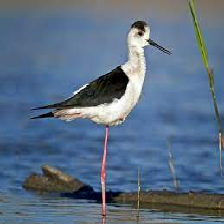

In [203]:
imga=image.load_img('birds_species/train_data/blasti/blasti1.jpeg',target_size=(224,224))
imga

In [204]:
imga = image.img_to_array(imga)
imga = np.expand_dims(imga,axis=0)
Model.predict(imga)
pred = np.argmax(Model.predict(imga))
output = ['blasti','bonegl','brhkyt','cbrtsh','cmnmyn','gretit','hilpig','himbul','himgri','hsparo','indvul','jglowl','lbicrw','mgprob','rebimg','wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 29ms/step
blasti


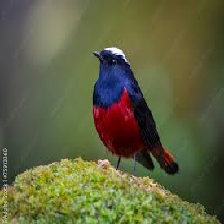

In [271]:
imgb=image.load_img('birds_species/test_data/wcrsrt/rebimg10.jpeg',target_size=(224,224))
imgb

In [272]:
imgb = image.img_to_array(imgb)
imgb = np.expand_dims(imgb,axis=0)
Model.predict(imgb)
pred = np.argmax(Model.predict(imgb))
output = ['blasti','bonegl','brhkyt','cbrtsh','cmnmyn','gretit','hilpig','himbul','himgri','hsparo','indvul','jglowl','lbicrw','mgprob','rebimg','wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 198ms/step
mgprob


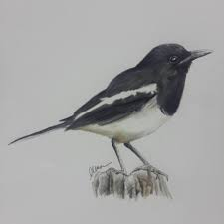

In [282]:
imgc=image.load_img('birds_species/test_data/mgprob/mgprob3.jpeg',target_size=(224,224))
imgc

In [283]:
imgc = image.img_to_array(imgc)
imgc = np.expand_dims(imgc,axis=0)
Model.predict(imgc)
pred = np.argmax(Model.predict(imgc))
output = ['blasti','bonegl','brhkyt','cbrtsh','cmnmyn','gretit','hilpig','himbul','himgri','hsparo','indvul','jglowl','lbicrw','mgprob','rebimg','wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 150ms/step
mgprob


Model2 - Model Tuning - Adding Dropout Layers and performing L2 Regularization

In [40]:
import os
print(os.getcwd())

c:\Users\harsh\Downloads\Assignment3


In [213]:
#Importing necessary Libraries 
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras import regularizers

In [220]:
Model1 = Sequential()
l2_lambda = 0.01

Model1.add(Convolution2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3), kernel_regularizer=regularizers.l2(l2_lambda)))
Model1.add(BatchNormalization())
Model1.add(MaxPooling2D(pool_size=(2, 2)))
Model1.add(Dropout(0.2))

Model1.add(Convolution2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(l2_lambda)))
Model1.add(BatchNormalization())
Model1.add(MaxPooling2D(pool_size=(2, 2)))
Model1.add(Dropout(0.3))

Model1.add(Convolution2D(256, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(l2_lambda)))
Model1.add(BatchNormalization())
Model1.add(MaxPooling2D(pool_size=(2, 2)))
Model1.add(Dropout(0.4))

Model1.add(Flatten())

Model1.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(l2_lambda)))
Model1.add(Dropout(0.5))

Model1.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(l2_lambda)))
Model1.add(Dropout(0.3))

Model1.add(Dense(16, activation='softmax'))


"model1 = Sequential()\n\n# Convolution and Pooling layers\nmodel1.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))\nmodel1.add(MaxPooling2D(pool_size=(2, 2)))\nmodel1.add(Convolution2D(64, (3, 3), activation='relu'))\nmodel1.add(MaxPooling2D(pool_size=(2, 2)))\nmodel1.add(Convolution2D(128, (3, 3), activation='relu'))\nmodel1.add(MaxPooling2D(pool_size=(2, 2)))\nmodel1.add(Convolution2D(128, (3, 3), activation='relu'))\nmodel1.add(MaxPooling2D(pool_size=(2, 2)))\n\n# Flatten layer\nmodel1.add(Flatten())\n\n# ANN Hidden layers\nmodel1.add(Dense(512, activation='relu'))\nmodel1.add(Dropout(0.3))\nmodel1.add(Dense(256, activation='relu'))\nmodel1.add(Dropout(0.3))\nmodel1.add(Dense(128, activation='relu'))\nmodel1.add(Dropout(0.2))\n\n# Output layer\nmodel1.add(Dense(16, activation='softmax'))"

In [221]:
Model1.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_53 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_53 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_54 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_54 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_55 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_55 (MaxPoolin  (None, 26, 26, 128)    

In [222]:
Model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [223]:
Model1.fit(train,batch_size=16,validation_data=test,epochs=50)

Epoch 1/50
38/38 [==============================] - 40s 1s/step - loss: 2.7354 - accuracy: 0.0976 - val_loss: 2.7316 - val_accuracy: 0.0927
Epoch 2/50
38/38 [==============================] - 37s 972ms/step - loss: 2.7321 - accuracy: 0.1044 - val_loss: 2.7312 - val_accuracy: 0.0993
Epoch 3/50
38/38 [==============================] - 37s 978ms/step - loss: 2.7276 - accuracy: 0.0808 - val_loss: 2.7291 - val_accuracy: 0.1026
Epoch 4/50
38/38 [==============================] - 38s 1s/step - loss: 2.6958 - accuracy: 0.1313 - val_loss: 2.7336 - val_accuracy: 0.0993
Epoch 5/50
38/38 [==============================] - 40s 1s/step - loss: 2.7047 - accuracy: 0.1178 - val_loss: 2.6964 - val_accuracy: 0.0960
Epoch 6/50
38/38 [==============================] - 40s 1s/step - loss: 2.6478 - accuracy: 0.1212 - val_loss: 2.6729 - val_accuracy: 0.1192
Epoch 7/50
38/38 [==============================] - 40s 1s/step - loss: 2.6086 - accuracy: 0.1582 - val_loss: 2.7105 - val_accuracy: 0.1026
Epoch 8/50
38/

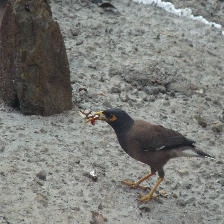

In [224]:
imga=image.load_img('P1050277.jpg',target_size=(224,224))
imga

In [225]:
imga = image.img_to_array(imga)
imga = np.expand_dims(imga,axis=0)
Model1.predict(imga)
pred = np.argmax(Model1.predict(imga))
output = ['blasti','bonegl','brhkyt','cbrtsh','cmnmyn','gretit','hilpig','himbul','himgri','hsparo','indvul','jglowl','lbicrw','mgprob','rebimg','wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 64ms/step
cmnmyn


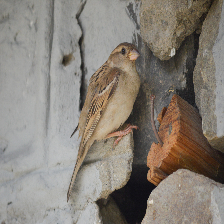

In [284]:
imgd=image.load_img('birds_species/test_data/hsparo/_DSC_11246.jpg',target_size=(224,224))
imgd

In [285]:
imgd = image.img_to_array(imgd)
imgd = np.expand_dims(imgd,axis=0)
Model1.predict(imgd)
pred = np.argmax(Model1.predict(imgd))
output = ['blasti','bonegl','brhkyt','cbrtsh','cmnmyn','gretit','hilpig','himbul','himgri','hsparo','indvul','jglowl','lbicrw','mgprob','rebimg','wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 92ms/step
cmnmyn


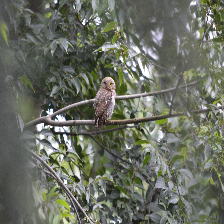

In [230]:
imgc=image.load_img('birds_species/test_data/jglowl/_D32_13515.jpg',target_size=(224,224))
imgc

In [231]:
imgc = image.img_to_array(imgc)
imgc = np.expand_dims(imgc,axis=0)
Model1.predict(imgc)
pred = np.argmax(Model1.predict(imgc))
output = ['blasti','bonegl','brhkyt','cbrtsh','cmnmyn','gretit','hilpig','himbul','himgri','hsparo','indvul','jglowl','lbicrw','mgprob','rebimg','wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 64ms/step
gretit


Model3 - Model Using VGG16

In [286]:
from tensorflow.keras.layers import Dense,Flatten,Input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import numpy as np

In [287]:
train_path = "birds_species/train_data"
test_path = "birds_species/test_data"

In [288]:
train_gen = ImageDataGenerator(rescale=1./255,
                               shear_range=0.2,
                               zoom_range=0.2,
                               horizontal_flip=True)

test_gen = ImageDataGenerator(rescale=1./255)

In [289]:
#passing data using another variables
train = train_gen.flow_from_directory(train_path,
                                      target_size=(224,224),
                                      class_mode='categorical',
                                      batch_size=22)

test = test_gen.flow_from_directory(test_path,
                                    target_size=(224,224),
                                    class_mode='categorical',
                                    batch_size=22)

Found 297 images belonging to 16 classes.
Found 302 images belonging to 16 classes.


In [340]:
from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [416]:
#Adding the Preprocessing(input) Layer to the front of vgg
vgg = VGG16(include_top=False,weights='imagenet',input_shape=(224,224,3))

In [417]:
for layer in vgg.layers:
    layer.trainable=False

In [418]:
x = Flatten()(vgg.output)

In [419]:
#output layer with Custom ANN Model 
prediction = Dense(128,activation='relu')(x)
prediction = Dense(64,activation='relu')(x)
prediction = Dense(32,activation='relu')(x)
prediction = Dense(16,activation='softmax')(x)

In [420]:
#create the vgg16 model/Skeleton 
modelvgg = Model(inputs=vgg.input,outputs=prediction)

In [421]:
modelvgg.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0  

In [422]:
modelvgg.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [423]:
modelvgg.fit(train,validation_data=test,epochs=15,
                    steps_per_epoch=len(train),
                    validation_steps = len(test))

Epoch 1/15
14/14 [==============================] - 58s 4s/step - loss: 3.3799 - accuracy: 0.1414 - val_loss: 2.9147 - val_accuracy: 0.2285
Epoch 2/15
14/14 [==============================] - 56s 4s/step - loss: 1.4147 - accuracy: 0.5488 - val_loss: 2.6879 - val_accuracy: 0.3411
Epoch 3/15
14/14 [==============================] - 57s 4s/step - loss: 0.9300 - accuracy: 0.7205 - val_loss: 2.7357 - val_accuracy: 0.3344
Epoch 4/15
14/14 [==============================] - 54s 4s/step - loss: 0.5789 - accuracy: 0.8350 - val_loss: 2.2167 - val_accuracy: 0.4172
Epoch 5/15
14/14 [==============================] - 57s 4s/step - loss: 0.3564 - accuracy: 0.9091 - val_loss: 2.2057 - val_accuracy: 0.4404
Epoch 6/15
14/14 [==============================] - 58s 4s/step - loss: 0.2255 - accuracy: 0.9495 - val_loss: 2.0007 - val_accuracy: 0.4603
Epoch 7/15
14/14 [==============================] - 57s 4s/step - loss: 0.1832 - accuracy: 0.9596 - val_loss: 2.2008 - val_accuracy: 0.4636
Epoch 8/15
14/14 [==

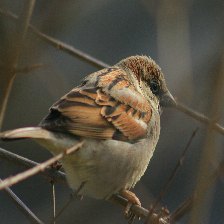

In [391]:
imgd=image.load_img('birds_species/test_data/hsparo/12265273154_48e0fefd42_o.jpg',target_size=(224,224))
imgd

In [392]:
imgd = image.img_to_array(imgd)
imgd = np.expand_dims(imgd,axis=0)
modelvgg.predict(imgd)
pred = np.argmax(modelvgg.predict(imgd))
output = ['blasti','bonegl','brhkyt','cbrtsh','cmnmyn','gretit','hilpig','himbul','himgri','hsparo','indvul','jglowl','lbicrw','mgprob','rebimg','wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 110ms/step
hsparo


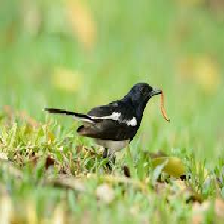

In [387]:
imgc=image.load_img('birds_species/test_data/mgprob/mgprob4.jpeg',target_size=(224,224))
imgc

In [388]:
imgc = image.img_to_array(imgc)
imgc = np.expand_dims(imgc,axis=0)
modelvgg.predict(imgc)
pred = np.argmax(modelvgg.predict(imgc))
output = ['blasti','bonegl','brhkyt','cbrtsh','cmnmyn','gretit','hilpig','himbul','himgri','hsparo','indvul','jglowl','lbicrw','mgprob','rebimg','wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 102ms/step
mgprob


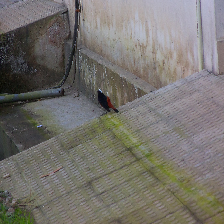

In [378]:
imgb=image.load_img('birds_species/test_data/wcrsrt/100_4462.JPG',target_size=(224,224))
imgb

In [379]:
imgb = image.img_to_array(imgb)
imgb = np.expand_dims(imgb,axis=0)
modelvgg.predict(imgb)
pred = np.argmax(modelvgg.predict(imgb))
output = ['blasti','bonegl','brhkyt','cbrtsh','cmnmyn','gretit','hilpig','himbul','himgri','hsparo','indvul','jglowl','lbicrw','mgprob','rebimg','wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 116ms/step
wcrsrt


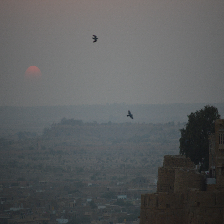

In [374]:
imgc=image.load_img('birds_species/test_data/hilpig/DSC_6368.jpg',target_size=(224,224))
imgc

In [375]:
imgc = image.img_to_array(imgc)
imgc = np.expand_dims(imgc,axis=0)
modelvgg.predict(imgc)
pred = np.argmax(modelvgg.predict(imgc))
output = ['blasti','bonegl','brhkyt','cbrtsh','cmnmyn','gretit','hilpig','himbul','himgri','hsparo','indvul','jglowl','lbicrw','mgprob','rebimg','wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 114ms/step
hilpig


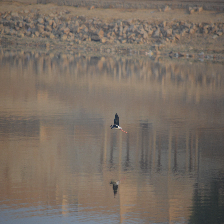

In [426]:
imge=image.load_img('birds_species/test_data/blasti/DSC_6397.jpg',target_size=(224,224))
imge

In [427]:
imge = image.img_to_array(imge)
imge = np.expand_dims(imge,axis=0)
modelvgg.predict(imge)
pred = np.argmax(modelvgg.predict(imge))
output = ['blasti','bonegl','brhkyt','cbrtsh','cmnmyn','gretit','hilpig','himbul','himgri','hsparo','indvul','jglowl','lbicrw','mgprob','rebimg','wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 112ms/step
blasti


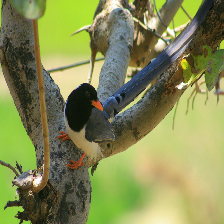

In [428]:
imgf=image.load_img('birds_species/test_data/rebimg/13009315305_f1cbfb6767_o.jpg',target_size=(224,224))
imgf

In [429]:
imgf = image.img_to_array(imgf)
imgf = np.expand_dims(imgf,axis=0)
modelvgg.predict(imgf)
pred = np.argmax(modelvgg.predict(imgf))
output = ['blasti','bonegl','brhkyt','cbrtsh','cmnmyn','gretit','hilpig','himbul','himgri','hsparo','indvul','jglowl','lbicrw','mgprob','rebimg','wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 100ms/step
rebimg
